<a href="https://colab.research.google.com/github/Blessan-Alex/Best_Intern_Using_Naive_Bayes/blob/main/BestIntern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the directory containing the chat files
directory_path = '/content/drive/MyDrive/BestInternData/'  # Adjust to your directory

In [ ]:
cleaned_data = []

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):  # Process only .txt files
        file_path = os.path.join(directory_path, filename)

        # Open and read the chat data from the current file
        with open(file_path, 'r', encoding='utf-8') as file:
            chat_data = file.readlines()

        # Define the regex pattern for extracting data
        pattern = r'(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2}\s?(?:AM|PM|am|pm| [ap]m)) - (.*?): (.*)'

        # Extract the relevant data (timestamp, sender, message)
        for line in chat_data:
            match = re.match(pattern, line)
            if match:
                date, time, sender, message = match.groups()
                cleaned_data.append([date, time, sender, message])

In [ ]:
# Convert cleaned data to DataFrame for easier manipulation
chat_df = pd.DataFrame(cleaned_data, columns=['Date', 'Time', 'Sender', 'Message'])

# Convert the Date and Time into a single datetime column
chat_df['Timestamp'] = pd.to_datetime(chat_df['Date'] + ' ' + chat_df['Time'],format='%d/%m/%y %I:%M %p')

# Calculate Message Frequency
message_frequency = chat_df['Sender'].value_counts().reset_index()
message_frequency.columns = ['Sender', 'Message Frequency']

# Calculate Responsiveness
# Calculate response times (time differences) for each sender
chat_df['Response Time'] = chat_df.groupby('Sender')['Timestamp'].diff().dt.total_seconds().fillna(0)
response_time_df = chat_df.groupby('Sender')['Response Time'].mean().reset_index()
response_time_df.columns = ['Sender', 'Average Response Time (s)']

In [ ]:
# Perform Sentiment Analysis and Content Positivity
def analyze_sentiment(message):
    blob = TextBlob(message)
    return blob.sentiment.polarity

chat_df['Sentiment'] = chat_df['Message'].apply(analyze_sentiment)
chat_df['Content Positivity'] = chat_df['Sentiment'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

# Aggregate the positivity score
positivity_score = chat_df.groupby('Sender')['Sentiment'].mean().reset_index()
positivity_score.columns = ['Sender', 'Average Positivity Score']

# Merge all metrics into a single DataFrame
final_df = message_frequency.merge(response_time_df, on='Sender').merge(positivity_score, on='Sender')

# Print the final DataFrame with all metrics
print(final_df)

                              Sender  Message Frequency  \
0                       MASAI SCHOOL                103   
1                       Blessan Alex                 32   
2                        Vikas Masai                 22   
3             Neha Kumari Shaw Madai                 13   
4                   Saurabh Intern A                 13   
5                    +91 95070 63945                  9   
6                    +91 97667 62796                  7   
7                    +91 91316 01329                  3   
8                    +91 72220 02992                  2   
9                    +91 70078 50891                  1   
10                   +91 91480 69213                  1   
11  Shlok Sharma Masai Ex Iit Kanpur                  1   
12                   +91 81028 57535                  1   
13                 Abhigyan Intern B                  1   
14                   +91 78690 43030                  1   
15                   Deepak Intern B                  1 

<ipython-input-11-7f6ef7f997be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sender', y='Message Frequency', data=final_df, palette='viridis')


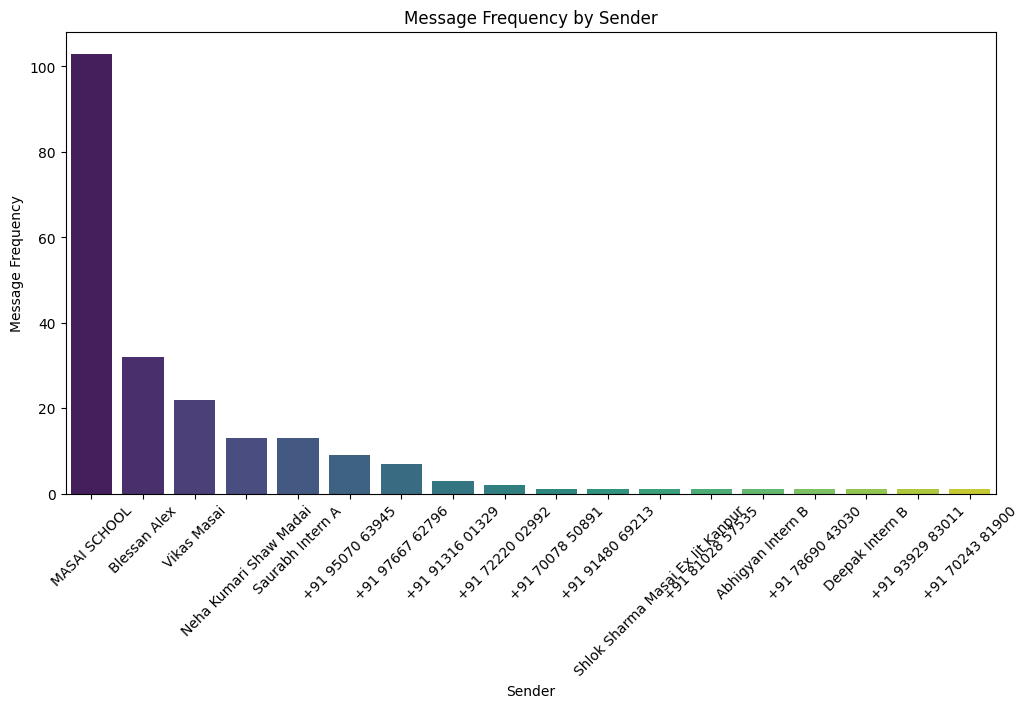

<ipython-input-11-7f6ef7f997be>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sender', y='Average Response Time (s)', data=final_df, palette='plasma')


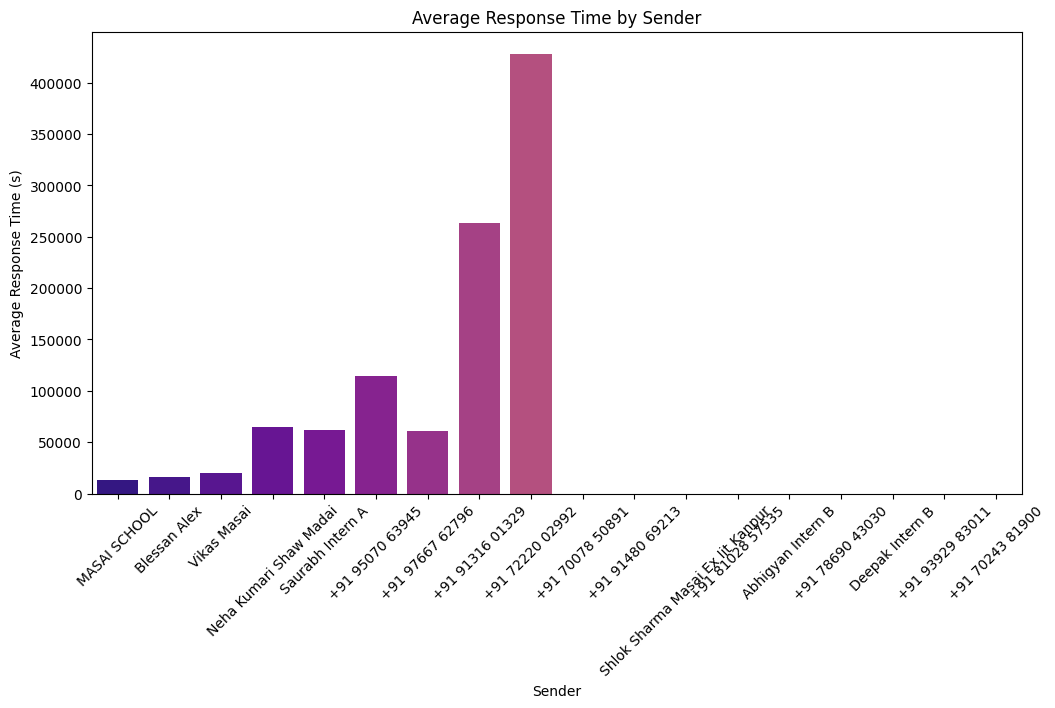

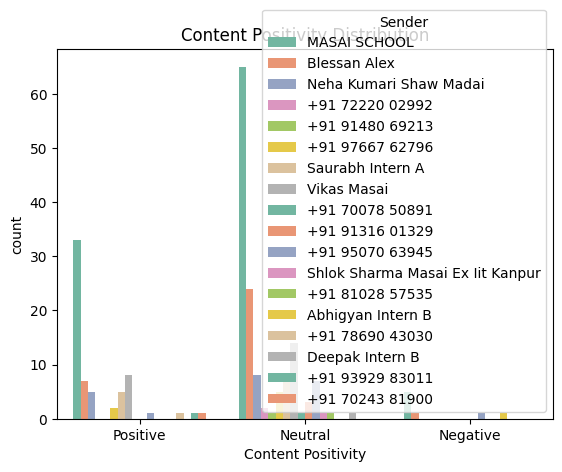

In [ ]:
# Visualization for Responsiveness, Message Frequency, and Positivity
plt.figure(figsize=(12, 6))
sns.barplot(x='Sender', y='Message Frequency', data=final_df, palette='viridis')
plt.title('Message Frequency by Sender')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sender', y='Average Response Time (s)', data=final_df, palette='plasma')
plt.title('Average Response Time by Sender')
plt.xticks(rotation=45)
plt.show()

# Visualization of Content Positivity
sns.countplot(data=chat_df, x='Content Positivity', hue='Sender', palette='Set2')
plt.title('Content Positivity Distribution')
plt.show()

In [ ]:
# Additional analyses and modeling...
# Tokenization and cleaning messages

stop_words = set(stopwords.words('english'))

def tokenize_and_clean_message(message):
    words = word_tokenize(message.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Apply tokenization
chat_df['Tokens'] = chat_df['Message'].apply(tokenize_and_clean_message)

# Create a list of all tokens from all messages
all_tokens = [token for sublist in chat_df['Tokens'] for token in sublist]

# Calculate frequency distribution
freq_dist = FreqDist(all_tokens)
most_common_words = freq_dist.most_common(10)

# Print the most common words with their frequencies
print("Most common words and their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common words and their frequencies:
sir: 34
meeting: 32
guys: 21
join: 19
know: 16
link: 13
https: 13
message: 12
let: 11
everyone: 11


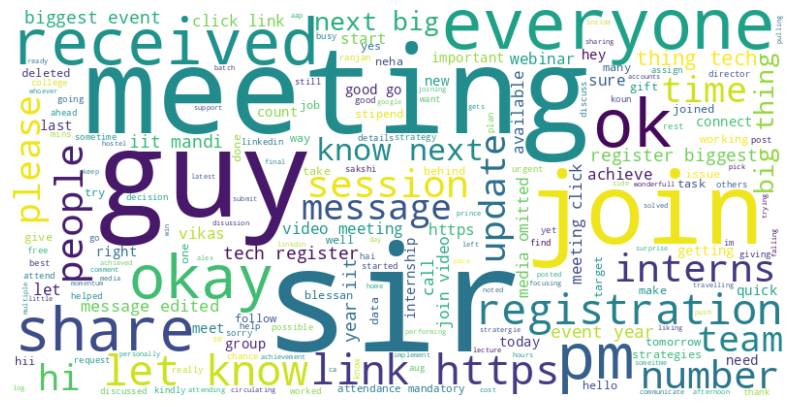

In [ ]:
 #Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


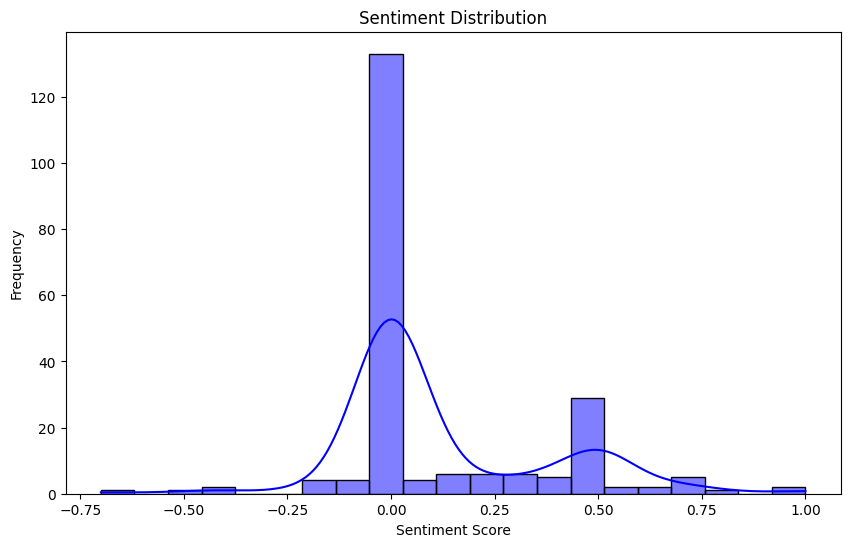

In [ ]:
# Extract sentiment scores from the cleaned data
sentiments = chat_df['Sentiment']

# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(sentiments, kde=True, color="blue")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Create DataFrame for performance labeling
df = chat_df[['Sender', 'Message', 'Sentiment']].copy()
df['Performance'] = df['Sentiment'].apply(lambda x: 'Best Intern' if x > 0.5 else 'Good Intern' if x > 0 else 'Needs Improvement')

# Merge frequency and response time into df
df = df.merge(message_frequency, on='Sender', how='left')
df = df.merge(response_time_df, on='Sender', how='left')

# Rename columns appropriately
df.rename(columns={'Message Frequency': 'Frequency', 'Average Response Time (s)': 'Response Time'}, inplace=True)

# Vectorize the message text
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df['Message'])

# Extract additional features
X_additional = df[['Frequency', 'Response Time']].values  # Ensure this is a NumPy array

# Combine the text features and additional features
from scipy.sparse import hstack
X = hstack((X_text, X_additional))  # Combine the sparse matrix with the additional features

y = df['Performance']  # Target variable remains the same

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')


Accuracy: 0.3488372093023256
Confusion Matrix:
[[ 0  0  0]
 [ 7  4  5]
 [13  3 11]]
Classification Report:
                   precision    recall  f1-score   support

      Best Intern       0.00      0.00      0.00         0
      Good Intern       0.57      0.25      0.35        16
Needs Improvement       0.69      0.41      0.51        27

         accuracy                           0.35        43
        macro avg       0.42      0.22      0.29        43
     weighted avg       0.64      0.35      0.45        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


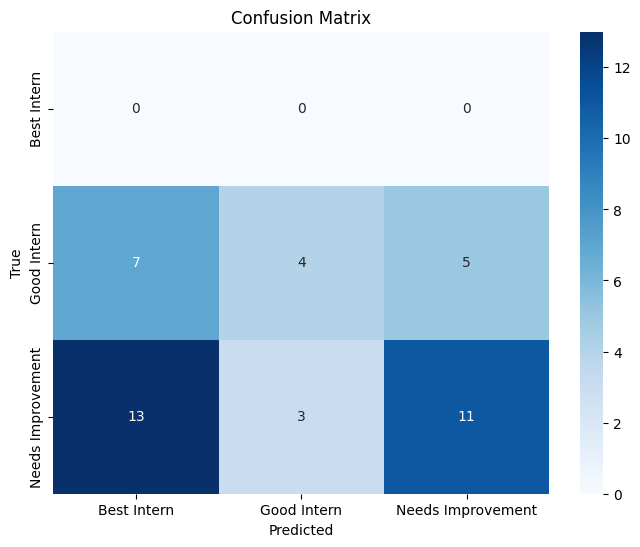

In [ ]:
# Create a heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create a DataFrame with Sender and Predictions
predictions_df = pd.DataFrame({'Sender': df['Sender'], 'Performance': model.predict(X)})
performance_summary = predictions_df.groupby('Sender')['Performance'].value_counts().unstack(fill_value=0)
print(performance_summary)

best_performers = performance_summary['Best Intern'].idxmax()
best_performer_count = performance_summary['Best Intern'].max()

print(f"The best performer is: {best_performers} with {best_performer_count} votes.")

Performance                       Best Intern  Good Intern  Needs Improvement
Sender                                                                       
+91 70078 50891                             1            0                  0
+91 70243 81900                             0            1                  0
+91 72220 02992                             0            0                  2
+91 78690 43030                             0            1                  0
+91 81028 57535                             1            0                  0
+91 91316 01329                             0            0                  3
+91 91480 69213                             1            0                  0
+91 93929 83011                             1            0                  0
+91 95070 63945                             0            0                  9
+91 97667 62796                             0            0                  7
Abhigyan Intern B                           1            0      

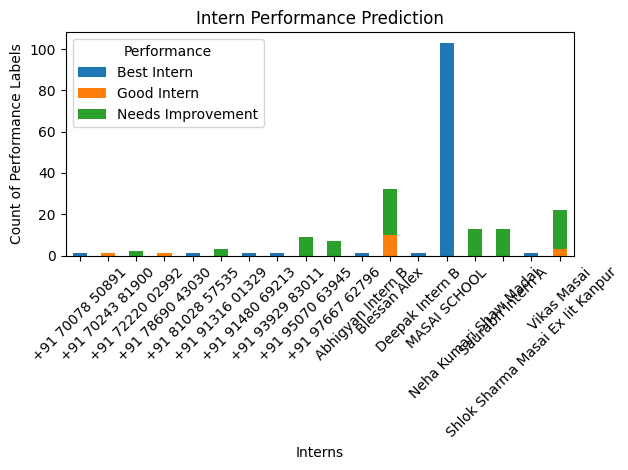

In [ ]:
# Plotting performance distribution
performance_summary.plot(kind='bar', stacked=True)
plt.title('Intern Performance Prediction')
plt.xlabel('Interns')
plt.ylabel('Count of Performance Labels')
plt.xticks(rotation=45)
plt.legend(title='Performance')
plt.tight_layout()
plt.show()

In [ ]:
# Export to Excel
output_file_path = '/content/drive/MyDrive/BestInternData/Output/intern_performance.xlsx'  # Specify the output file path
performance_summary.to_excel(output_file_path)

print(f'Performance data has been saved to {output_file_path}')

Performance data has been saved to /content/drive/MyDrive/BestInternData/Output/intern_performance.xlsx
